In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [36]:
players <- read_csv("https://raw.githubusercontent.com/ansonansonnn/project-data/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [37]:
sessions <- read_csv("https://raw.githubusercontent.com/ansonansonnn/project-data/refs/heads/main/sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


1) Data Description:
Players Dataset:
- Number of observations: 196
- Number of variables: 7
- 4 chr variables outlining experience, email, name, gender
- 1 lgl variable for subscription status
- 2 dbl variables outlining age and hours played
- Average age of players is 21.14 an average play time (in hours) is 5.85

In [31]:
players |>
    summarise(players_mean_age = mean(Age, na.rm = TRUE), players_mean_hours = mean(played_hours, na.rm = TRUE))

players_mean_age,players_mean_hours
<dbl>,<dbl>
21.13918,5.845918


1. Data Description: Sessions Dataset:

- Number of observations: 1535
- Number of variables: 5
- 3 chr variables outlining email, start time, end time
- 2 dbl variables outlining original start time and original end time
- The mean original start time is 1.72 x 10^12, and the mean original end time is 1.72 x 10^12
- One thing I will have to figure out is what I need to do to convert the original times into the standard times. 

In [32]:
sessions |>
    summarise(sessions_mean_start_time = mean(original_start_time, na.rm = TRUE), sessions_mean_end_time = mean(original_end_time, na.rm = TRUE))

sessions_mean_start_time,sessions_mean_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


2. Questions
- Broad Question: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
- Specific Question: Can age be used to predict game played hours? This question is asked using the "players" dataset
- I am going to try to wrangle the data and use the age variable and predict using either linear or knn regression. I would measure distance from each new tibble to the fit line and predict hours played from there. Other data such as email, gender, experience, subscription status, or name should not be needed here.

3. Exploratory Data Analysis and Visualization
- Loading the dataset: See above

In [33]:
# Finding mean values for Players dataset

players |>
    summarise(players_mean_age = mean(Age, na.rm = TRUE), players_mean_hours = mean(played_hours, na.rm = TRUE))

players_mean_age,players_mean_hours
<dbl>,<dbl>
21.13918,5.845918


The players.csv dataset is tidy. It is tidy because each row pertains to its own observation (each different player) and each cell represents its own unique measurement, without any overlapping measurements, and only one numerical value where appropriate. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


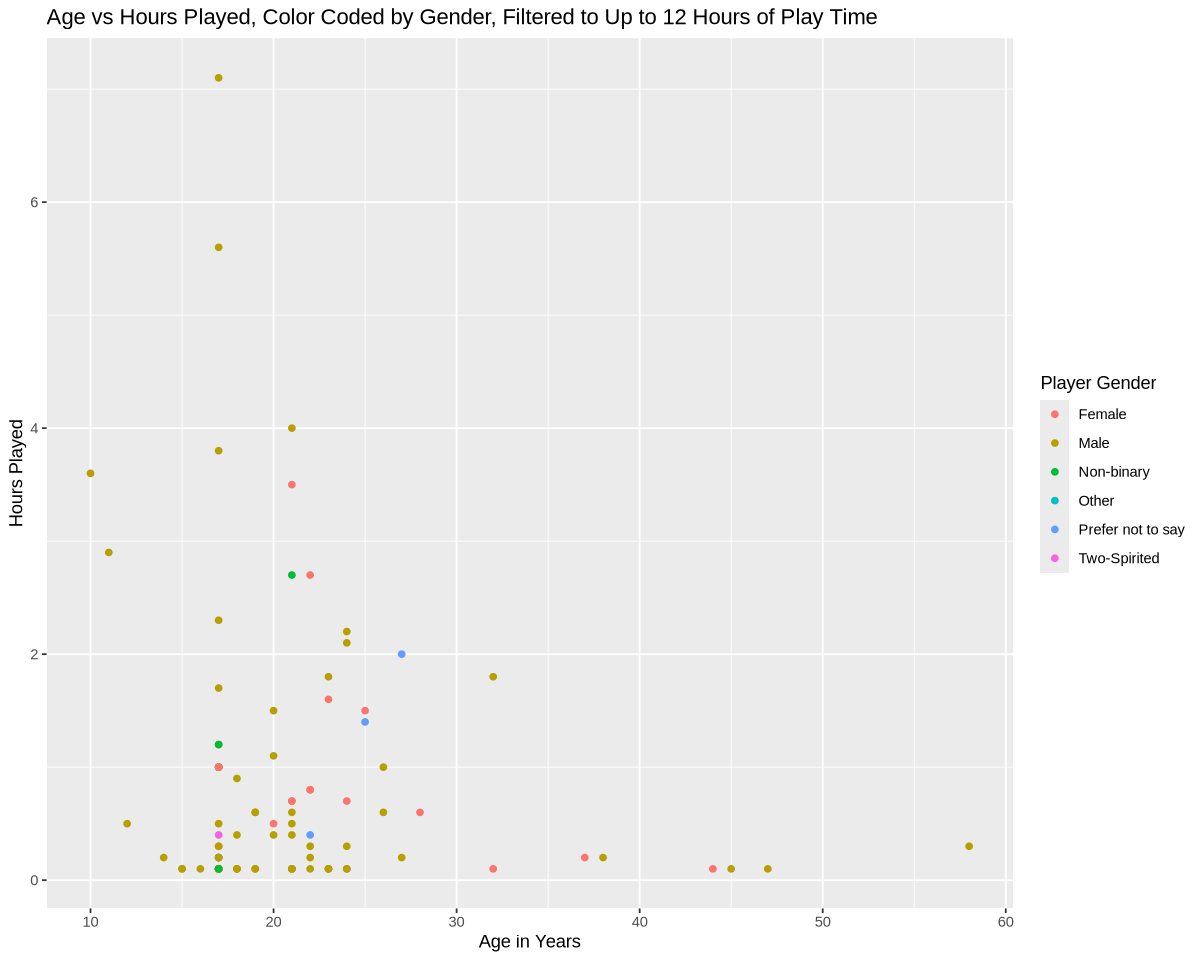

In [34]:
# Plotting the relationship between age and hours played, color coded by gender, filtered by players between  > 0 and 12 hours of playing time
options(repr.plot.height = 8, repr.plot.width = 10)
players_filtered <- players |>
    filter(played_hours <= 12, played_hours > 0)
age_hours_plot <- players_filtered |>
    ggplot(aes(x = Age, y = played_hours, color = gender)) +
    geom_point() +
    labs(x = "Age in Years", y = "Hours Played", color = "Player Gender", title = "Age vs Hours Played, Color Coded by Gender, Filtered to Up to 12 Hours of Play Time")
age_hours_plot

This graph helps me get a rough idea of the time spent playing vs age, and helps me map out the tendencies of playing time between different age groups.

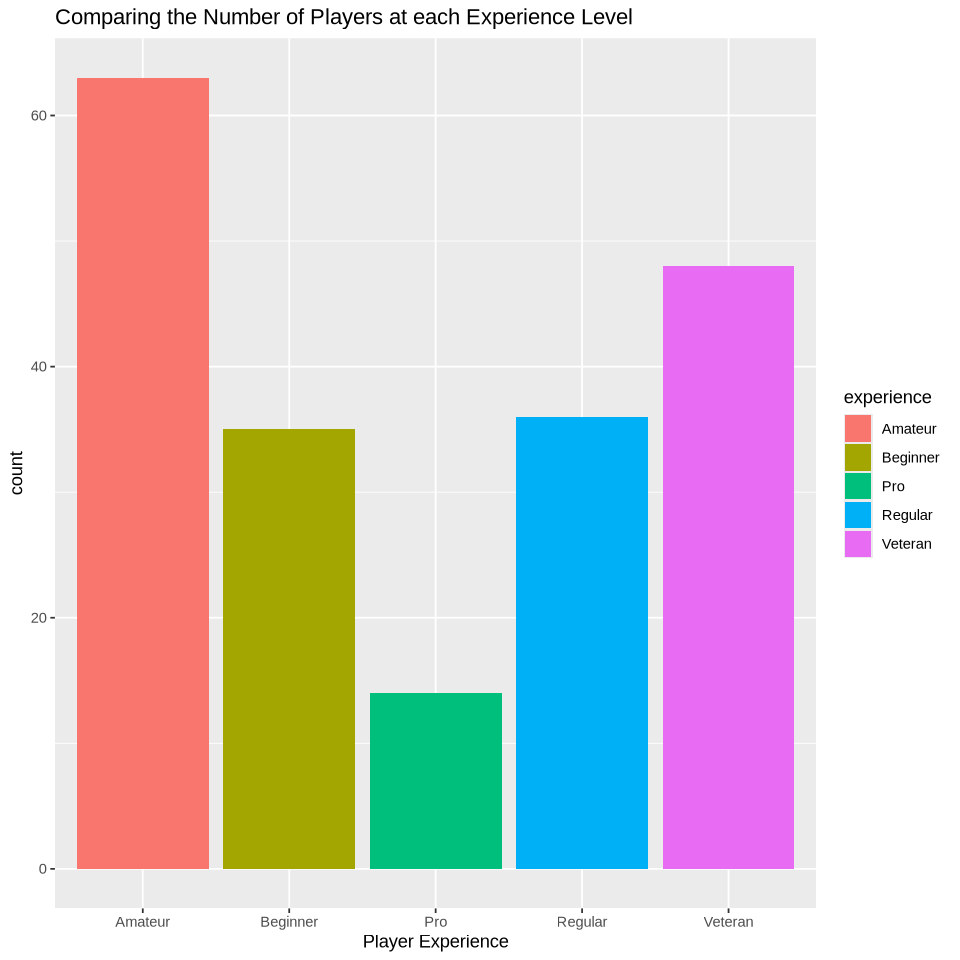

In [35]:
options(repr.plot.width = 8, repr.plot.height = 8)
# Comparing the Number of Players at each Experience Level
exp_plot <- players |>
    ggplot(aes(x = experience, fill = experience)) +
    geom_bar() +
    labs(x = "Player Experience", title = "Comparing the Number of Players at each Experience Level")
exp_plot

This graph is just for me to visualize the number of people at each experience level, as it could influence play time/willingness to play

4. Methods and Plan
- The one method that I am going to use to answer my question of whether age can be used to determine the hours played is linear regression. I am using linear regression. I am using linear regression because as I explored different visualizations of my data, I failed to find any linearity. Also, since I have some sparse, isolated, data points, KNN regression would be very inaccurate especially with predictions away from the main clump of data points. However, I can compare RMSE and RMPSE to truly figure out which one is better. The good thing about this method is that there aren't really any huge assumptions that I need to make. I will only use rows of data with both an age and hours played value, using na.rm = true to filter out any possible NA's. One potential weakness is that linear regression assumes that my data is a straight line relationship, however we know that is not the case. For my data, I am going to isolate the Age and hours_played variables. I will split it with 75% going to training and 25% to testing. Overall, I feel like these steps will set me up for success. 